<a href="https://colab.research.google.com/github/Nezamisafa/Ransomware-Detection-by-Network-Traffic-Analysis/blob/main/RansomwareDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
#Loading the data
data0 = pd.read_csv('/content/drive/MyDrive/Dataset/DataAnalysis6.csv')
data0.head()

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Original_label
0,55581,443,6,57298,23392,1,2,0,23,0,0,0,0,23,0,11,16,983,128,11696,16527,23383,9,0,0,0,0,0,9,9,0,9,9,0,32,64,42,85,0,23,5,11,132,0,0,0,1,1,2,7,0,11,32,1,0,2,23,2048,1521,0,32,0,0,0,0,0,0,0,0,0,BENIGN
1,48307,443,6,8431,1144,2,0,0,0,0,0,0,0,0,0,0,0,0,1748,1144,0,1144,1144,1144,1144,0,1144,1144,0,0,0,0,0,0,40,0,1748,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,40,2,0,0,0,1597,-1,0,20,0,0,0,0,0,0,0,0,0,BENIGN
2,38972,443,6,17219,16597541,2,0,0,0,0,0,0,0,0,0,0,0,0,0,16597541,0,16597541,16597541,16597541,16597541,0,16597541,16597541,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,40,2,0,0,0,1369,-1,0,20,0,0,0,0,0,0,0,0,0,BENIGN
3,42899,80,6,5327,79054,3,0,0,0,0,0,0,0,0,0,0,0,0,37,39527,9666,46362,32692,79054,39527,9666,46362,32692,0,0,0,0,0,0,60,0,37,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,60,3,0,0,0,1386,-1,0,20,0,0,0,0,0,0,0,0,0,BENIGN
4,57081,443,6,24390,220848,16,16,1375,5614,732,0,85,187,1418,0,350,534,31646,144,7124,10215,38380,9,198647,13243,17271,59989,72,198273,13218,16841,40973,9,0,520,520,72,72,0,1418,211,411,169460,0,0,1,0,0,1,218,85,350,520,16,1375,16,5614,65535,360,8,32,0,0,0,0,0,0,0,0,0,BENIGN


In [155]:
 sizes = data0['Original_label'].value_counts(sort=1)
 print(sizes)

BENIGN                    250000
RANSOMWARE_SVPENG          54161
RANSOMWARE_PORNDROID       46082
RANSOMWARE_KOLER           44555
RANSOMWARE_RANSOMBO        39859
RANSOMWARE_CHARGER         39551
RANSOMWARE_SIMPLOCKER      36340
RANSOMWARE_WANNALOCKER     32701
RANSOMWARE_JISUT           25672
RANSOMWARE_LOCKERPIN       25307
RANSOMWARE_PLETOR           4715
Name: Original_label, dtype: int64


In [156]:
data0.shape

(598943, 71)

In [157]:
sizes = data0['Label'].value_counts(sort=1)
print(sizes)

0     250000
9      54161
6      46082
3      44555
7      39859
1      39551
8      36340
10     32701
2      25672
4      25307
5       4715
Name: Label, dtype: int64


In [158]:
# sizes = data0['Original_label'].value_counts(sort=1)
# print(sizes)
# data0.columns

In [159]:
data0=data0.drop('Original_label',axis=1)
dx = data0.query("Label == 5")
num=len(dx)*4
num= int (num)
d0 = data0.query("Label == 0").sample(num)
# d0 = data0.query("Label == 0").sample(n=len(dx))
data0=pd.concat([d0,dx])
# print('Count:'+str(num))

In [160]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
def select_k_best(score, X, Y):
    selector = SelectKBest(score, k=10)
    X_ = X.fillna(X.mean())
    selector.fit_transform(X_, Y)
    names = X.columns.values[selector.get_support()]
    scores = selector.scores_[selector.get_support()]
    names_scores = list(zip(names, scores))
    df_reduced = pd.DataFrame(data=names_scores, columns=['feature_names', 'score'])
    df_reduced = df_reduced.sort_values(['score', 'feature_names'], ascending=[False, True])
    print(df_reduced)
    return df_reduced.feature_names

In [161]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif
frs_mi = select_k_best(mutual_info_classif, data0[data0.columns.difference(['Label', ' Timestamp'])], data0.Label)
d4=frs_mi.values
d5=np.append(d4,'Label')
data0=data0[d5]

                 feature_names     score
8       Init_Win_bytes_forward  0.215907
0             Destination Port  0.181038
6                  Source Port  0.128445
3        Fwd Packet Length Max  0.123910
7            Subflow Fwd Bytes  0.121073
4      Init_Win_bytes_backward  0.119389
9  Total Length of Fwd Packets  0.118796
5            Max Packet Length  0.112312
1                Flow Duration  0.107655
2            Fwd Header Length  0.103711


In [162]:
frs_mi.values

array(['Init_Win_bytes_forward', ' Destination Port', ' Source Port',
       ' Fwd Packet Length Max', ' Subflow Fwd Bytes',
       ' Init_Win_bytes_backward', 'Total Length of Fwd Packets',
       ' Max Packet Length', ' Flow Duration', ' Fwd Header Length'],
      dtype=object)

In [163]:
# import numpy as np
# from sklearn.feature_selection import mutual_info_classif, f_classif
# frs_anova = select_k_best(f_classif, data0[data0.columns.difference(['Label', ' Timestamp'])], data0.Label)
# d4=frs_anova.values
# d5=np.append(d4,'Label')
# data0=data0[d5]

In [164]:
# Anova = data0[[' Active Max', ' Active Std', ' act_data_pkt_fwd', 'Active Mean',' Subflow Fwd Bytes', 'Total Length of Fwd Packets',' Flow IAT Mean', ' Fwd IAT Max', 'Fwd IAT Total',' URG Flag Count', ' Total Fwd Packets', 'Subflow Fwd Packets',' Fwd IAT Mean', ' Flow IAT Max', ' Flow Duration', ' Active Min','Label']]
# MI = data0[[' Destination Port',' Packet Length Variance', ' Flow Duration', ' Flow IAT Mean', 'Init_Win_bytes_forward',' Total Length of Bwd Packets','Total Length of Fwd Packets',' Init_Win_bytes_backward', 'Fwd IAT Total',' Fwd Packet Length Max', ' Flow IAT Min', ' Fwd IAT Max',' Fwd IAT Mean','Label']]
# Tau=data0[[' ACK Flag Count',' Active Max',' Active Std',' Average Packet Size',' Avg Fwd Segment Size',' Bwd Header Length',' Bwd IAT Max',' Bwd Packet Length Min',' Bwd Packet Length Std',' Bwd Packets/s',' Down/Up Ratio', ' Flow Duration',' Flow IAT Mean', ' Flow IAT Min', ' Flow IAT Std',' Fwd Header Length', ' Fwd IAT Max',' Fwd IAT Min',' Fwd Packet Length Min', ' Fwd Packet Length Std',' Init_Win_bytes_backward', ' PSH Flag Count', ' SYN Flag Count',' act_data_pkt_fwd', ' min_seg_size_forward','Flow Bytes/s', 'Init_Win_bytes_forward','Label']]
# MI2 = data0[['Label','Init_Win_bytes_forward', ' Destination Port',' Source Port','Total Length of Fwd Packets',' Fwd Packet Length Max', ' Init_Win_bytes_backward',' Max Packet Length', ' Flow Duration', ' Flow IAT Min',' Fwd Header Length.1', ' Flow IAT Max',' Flow IAT Mean']]
# Pca =data0[[' Bwd Header Length','Fwd IAT Total',' Idle Min', ' Fwd IAT Min', ' Flow Duration', ' Bwd IAT Min', ' Idle Std',' Bwd IAT Std', ' Flow IAT Min', ' min_seg_size_forward',' Bwd IAT Max', ' Active Max',' Flow IAT Std', 'Flow Bytes/s',' Active Min',' Flow IAT Max','Label']]
# Gain = data0[[' Subflow Fwd Bytes',' Flow Packets/s','Fwd Packets/s',' Flow IAT Min',' Flow IAT Max',' Flow IAT Mean',' Flow Duration',' Fwd Packet Length Max',' Init_Win_bytes_backward','Init_Win_bytes_forward','Label']]
# data0=MI2

## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [165]:
#Checking the shape of the dataset
sizes = data0['Label'].value_counts(sort=1)
print(sizes)

0    18860
5     4715
Name: Label, dtype: int64


In [166]:
#Listing the features of the dataset
data0.columns

Index(['Init_Win_bytes_forward', ' Destination Port', ' Source Port',
       ' Fwd Packet Length Max', ' Subflow Fwd Bytes',
       ' Init_Win_bytes_backward', 'Total Length of Fwd Packets',
       ' Max Packet Length', ' Flow Duration', ' Fwd Header Length', 'Label'],
      dtype='object')

In [167]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23575 entries, 79218 to 350248
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Init_Win_bytes_forward       23575 non-null  int64
 1    Destination Port            23575 non-null  int64
 2    Source Port                 23575 non-null  int64
 3    Fwd Packet Length Max       23575 non-null  int64
 4    Subflow Fwd Bytes           23575 non-null  int64
 5    Init_Win_bytes_backward     23575 non-null  int64
 6   Total Length of Fwd Packets  23575 non-null  int64
 7    Max Packet Length           23575 non-null  int64
 8    Flow Duration               23575 non-null  int64
 9    Fwd Header Length           23575 non-null  int64
 10  Label                        23575 non-null  int64
dtypes: int64(11)
memory usage: 2.2 MB


## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

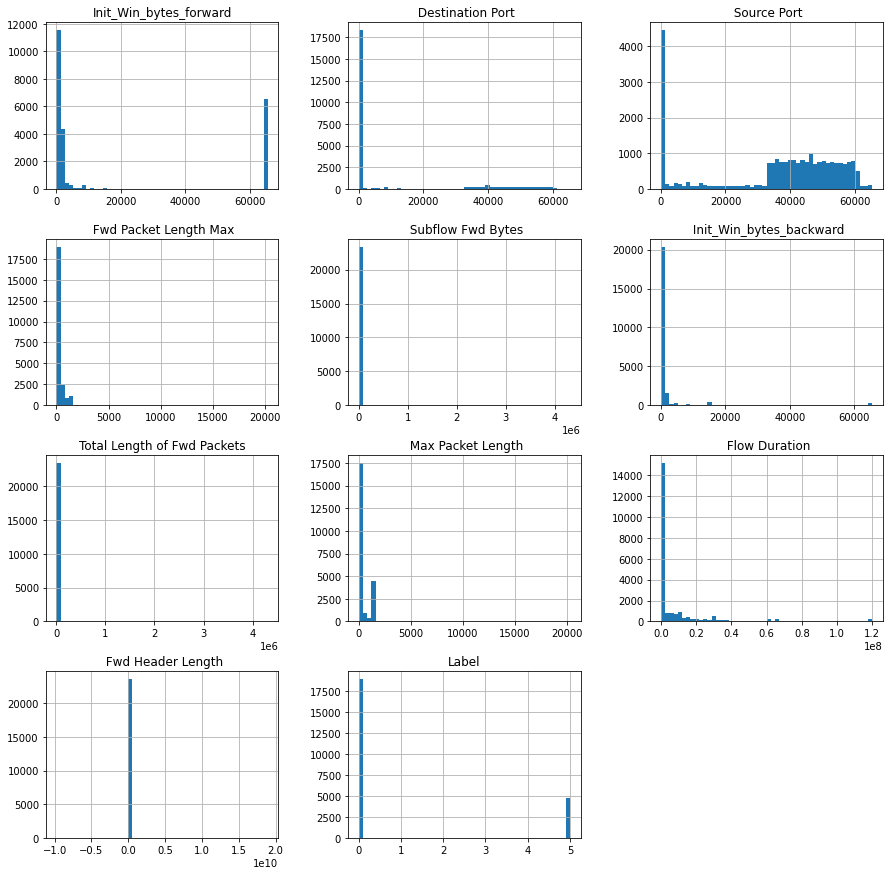

In [168]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

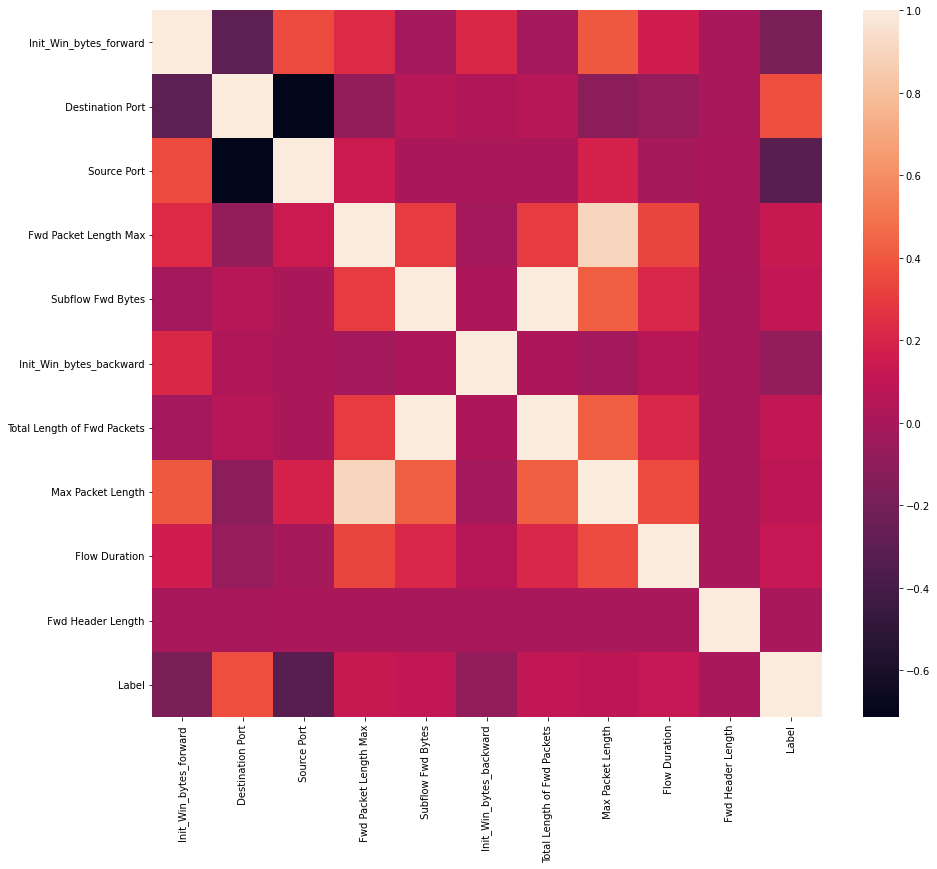

In [169]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [170]:
data0.describe()

,Init_Win_bytes_forward,Destination Port,Source Port,Fwd Packet Length Max,Subflow Fwd Bytes,Init_Win_bytes_backward,Total Length of Fwd Packets,Max Packet Length,Flow Duration,Fwd Header Length,Label
count,23575.000000,23575.000000,23575.000000,23575.000000,2.357500e+04,23575.000000,2.357500e+04,23575.000000,2.357500e+04,2.357500e+04,23575.000000
mean,18772.896119,9336.743754,35123.428293,259.109905,3.961422e+03,1600.446023,3.961422e+03,421.559703,1.173488e+07,3.890297e+05,1.000000
std,28947.649768,18485.390303,20616.797477,852.182528,6.583992e+04,7606.666810,6.583992e+04,987.538156,2.497468e+07,1.387199e+08,2.000042
min,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000e+00,0.000000,1.000000e+00,-9.765434e+09,0.000000
25%,0.000000,80.000000,18564.500000,0.000000,0.000000e+00,-1.000000,0.000000e+00,0.000000,4.893300e+04,3.200000e+01,0.000000
50%,1369.000000,443.000000,41218.000000,31.000000,3.100000e+01,-1.000000,3.100000e+01,47.000000,4.551750e+05,6.400000e+01,0.000000
75%,65535.000000,443.000000,51061.000000,219.000000,3.720000e+02,349.000000,3.720000e+02,488.000000,1.000953e+07,1.360000e+02,0.000000
max,65535.000000,65351.000000,65491.000000,20272.000000,4.309688e+06,65535.000000,4.309688e+06,20272.000000,1.199997e+08,1.892826e+10,5.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [171]:
#Dropping the Domain column
# data = data0.drop(['Domain'], axis = 1).copy()
data = data0

This leaves us with 16 features & a target column. The *'Init_Win_bytes_forward'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [172]:
#checking the data for null or missing values
data.isnull().sum()

Init_Win_bytes_forward         0
 Destination Port              0
 Source Port                   0
 Fwd Packet Length Max         0
 Subflow Fwd Bytes             0
 Init_Win_bytes_backward       0
Total Length of Fwd Packets    0
 Max Packet Length             0
 Flow Duration                 0
 Fwd Header Length             0
Label                          0
dtype: int64

In [173]:
data.columns.values

array(['Init_Win_bytes_forward', ' Destination Port', ' Source Port',
       ' Fwd Packet Length Max', ' Subflow Fwd Bytes',
       ' Init_Win_bytes_backward', 'Total Length of Fwd Packets',
       ' Max Packet Length', ' Flow Duration', ' Fwd Header Length',
       'Label'], dtype=object)

In [174]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Init_Win_bytes_forward,Destination Port,Source Port,Fwd Packet Length Max,Subflow Fwd Bytes,Init_Win_bytes_backward,Total Length of Fwd Packets,Max Packet Length,Flow Duration,Fwd Header Length,Label
0,357,40243,443,0,0,1679,0,0,50446,32,0
1,9,60308,12350,0,0,0,0,0,7799,32,0
2,65535,80,57143,0,0,14600,0,0,15581488,80,0
3,0,443,49011,0,0,-1,0,0,211,40,0
4,1612,80,55497,0,0,676,0,0,13589,32,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [175]:
from sklearn import tree
# feature_cols = ['Init_Win_bytes_forward',' Flow Duration',' Init_Win_bytes_backward',' Fwd IAT Min',' Flow IAT Max',' Fwd IAT Max',' Fwd Packet Length Max',' Flow IAT Min',' Fwd IAT Mean',' Flow IAT Max',' Flow Packets/s','Fwd Packets/s']
# y = data.Label # Target variable
# data = data.drop('Label',axis=1)
# X = data[feature_cols] # Features

# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, y)
# print(clf.tree_.max_depth)

((23575, 10), (23575,))

In [176]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 100)
X_train.shape, X_test.shape

((17681, 10), (5894, 10))

---------------------------------------------------------------------------------------

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* XGBoost

In [177]:
#importing packages
from sklearn.metrics import accuracy_score

In [178]:
# # Creating holders to store the model performance results
# ML_Model = []
# acc_train = []
# acc_test = []

# #function to call for storing the results
# def storeResults(model, a,b):
#   ML_Model.append(model)
#   acc_train.append(round(a, 3))
#   acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**


In [179]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support



**Performance Evaluation:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.10549100000000067 seconds
Accuracy of DT: 0.9443501866304717
Precision of DT: 0.944119167081537
Recall of DT: 0.9443501866304717
F1-score of DT: 0.9442268867986745
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4704
           5       0.87      0.86      0.86      1190

    accuracy                           0.94      5894
   macro avg       0.92      0.91      0.91      5894
weighted avg       0.94      0.94      0.94      5894



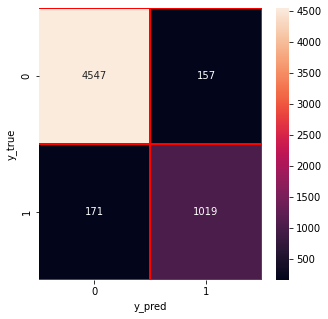

In [180]:
# Decision tree training and prediction
import time
start_time = time.clock()
tree = DecisionTreeClassifier(random_state = 100)
tree.fit(X_train,y_train) 
dt_score=tree.score(X_test,y_test)
y_predict=tree.predict(X_test)
print (time.clock() - start_time, "seconds")
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

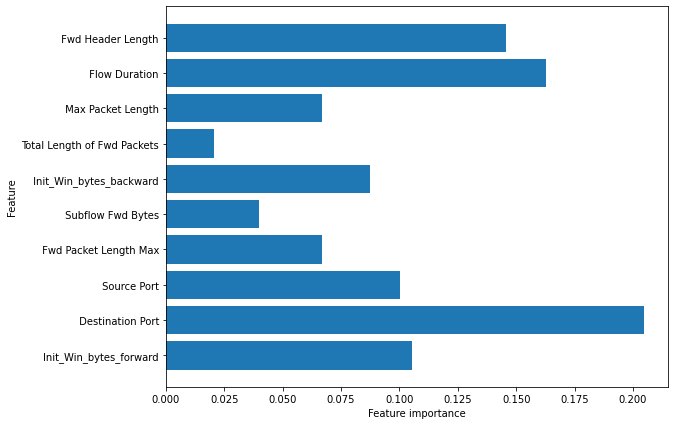

In [181]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


**Storing the results:**

In [182]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
# storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [183]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


1.3382760000000076 seconds
Accuracy of RF: 0.9136409908381404
Precision of RF: 0.9124003856596528
Recall of RF: 0.9136409908381404
F1-score of RF: 0.9082138035948809
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4704
           5       0.89      0.65      0.75      1190

    accuracy                           0.91      5894
   macro avg       0.91      0.81      0.85      5894
weighted avg       0.91      0.91      0.91      5894



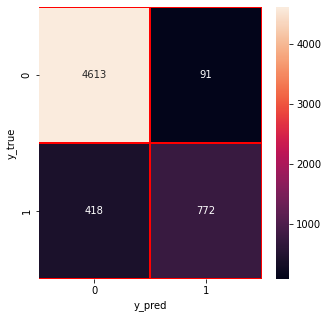

In [184]:
# Random Forest training and prediction 
# instantiate the model
import time
start_time = time.clock()
forest = RandomForestClassifier(max_depth=5,random_state = 0)
forest.fit(X_train, y_train)
rf_score=forest.score(X_test,y_test)
print (time.clock() - start_time, "seconds")
y_predict=forest.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**Performance Evaluation:**

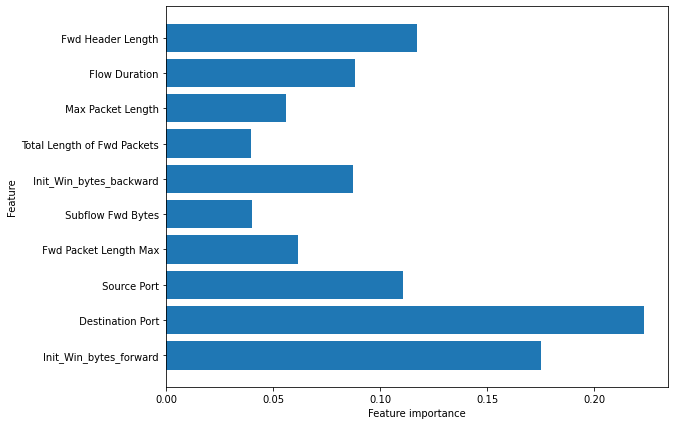

In [185]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [186]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
# storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [187]:
# from google.colab import drive
# drive.mount('/content/drive')

In [188]:
#XGBoost Classification model
# grid search positive class weights with xgboost for imbalance classification
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [189]:
#predicting the target value from the model for the samples
# y_test_xgb = xgb.predict(X_test)
# y_train_xgb = xgb.predict(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


1.0338279999999997 seconds
Accuracy of XGBoost: 0.9524940617577197
Precision of XGBoost: 0.9517874391748667
Recall of XGBoost: 0.9524940617577197
F1-score of XGBoost: 0.9518845383467976
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4704
           5       0.91      0.85      0.88      1190

    accuracy                           0.95      5894
   macro avg       0.94      0.91      0.92      5894
weighted avg       0.95      0.95      0.95      5894



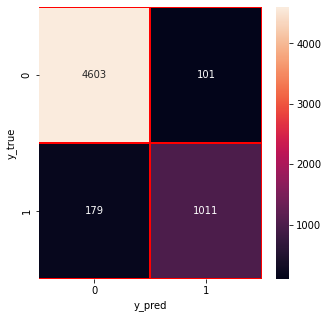

In [190]:
import time
start_time = time.clock()
xgb = XGBClassifier(learning_rate=0.25,random_state = 100)
xgb.fit(X_train, y_train)
xg_score=xgb.score(X_test,y_test)
print (time.clock() - start_time, "seconds")
y_predict=xgb.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**Performance Evaluation:**

**Storing the results:**

<Figure size 648x504 with 0 Axes>

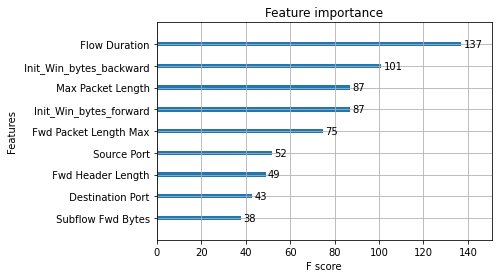

In [191]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plt.figure(figsize=(9,7))
plot_importance(xgb)
pyplot.show()

In [192]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# n_features = X_train.shape[1]
# plt.barh(range(n_features), xgb.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

In [193]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
# storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

**Storing the results:**

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/